In [1]:
import tkinter as tk
from tkinter import messagebox
import joblib
import shap
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris=load_iris()
x=iris.data
y=iris.target

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
model=Sequential()

In [6]:
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train,epochs=50,batch_size=16,verbose=0)

In [9]:
joblib.dump(model,'shap.pkl')

['shap.pkl']

In [10]:
feature_name = iris.feature_names

In [11]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
feature_name_encoded = encode.fit_transform(feature_name)
feature_name_decode = encode.inverse_transform(feature_name_encoded)

In [12]:
def run_with_shap():
    model=joblib.load('shap.pkl')
    shap_Explainer=shap.Explainer(model,x_train)
    
    shap_values=shap_Explainer(x_test)
    
    shap.summary_plot(shap_values,x_test,feature_names=feature_name_decode)

In [17]:
root=tk.Tk()
root.title("Model Explanation Tool")

''

In [18]:
shap_button=tk.Button(root,text="Explain with SHAP",command=run_with_shap)

In [19]:
shap_button.pack(pady=10)

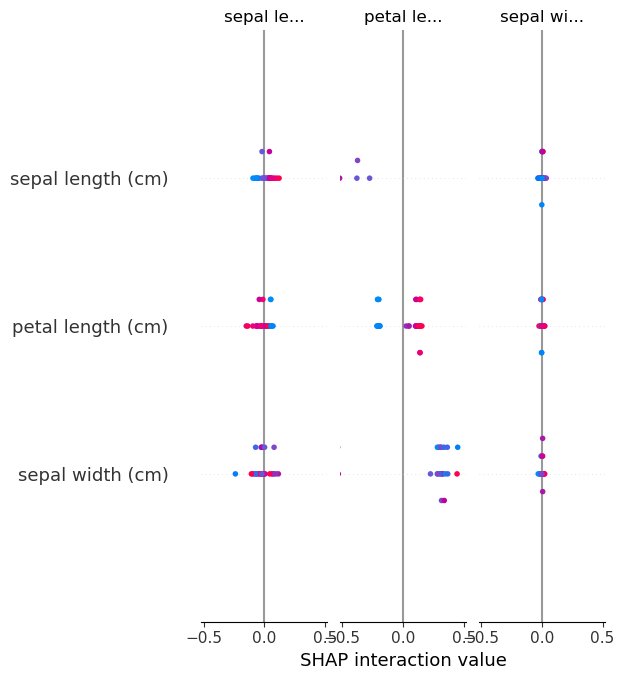

In [20]:
root.mainloop()